In [51]:
import pandas as pd

df = pd.read_csv("/content/creditcard.csv")

print(df.shape)
print(df["Class"].value_counts())
df.head()


(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.drop("Class", axis=1)
y = df["Class"]


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [32]:
X_train = X_scaled[y == 0]   # non-fraud only
X_test = X_scaled            # full data for testing
y_test = y


In [33]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (284315, 30)
Test data shape: (284807, 30)


In [34]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))

encoded = Dense(16, activation="relu")(input_layer)
encoded = Dense(8, activation="relu")(encoded)

decoded = Dense(16, activation="relu")(encoded)
output_layer = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.02 KB)

 Trainable params: 1,286 (5.02 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.8347 - val_loss: 0.6300
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5968 - val_loss: 0.5400
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5263 - val_loss: 0.5130
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4983 - val_loss: 0.5007
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4753 - val_loss: 0.4927
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4593 - val_loss: 0.4813
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4509 - val_loss: 0.4768
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4472 - val_loss: 0.4729
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4406 - val_loss: 0.4681
Epoch 10/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4400 - val_loss: 0.4650
Epoch 11/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4351 - val_loss: 0.4605
Epoch 12/20
1000/1000 ━━━━━━━━

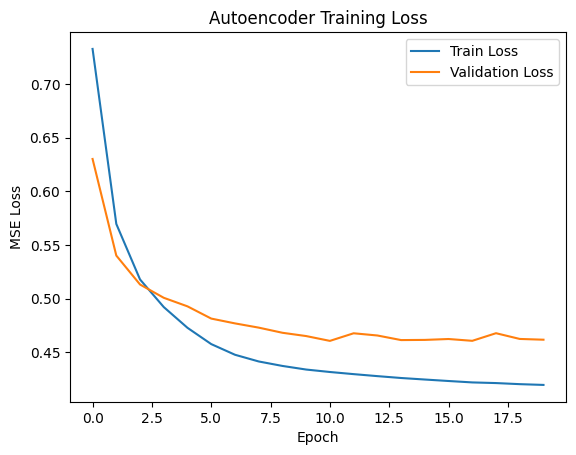

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Autoencoder Training Loss")
plt.show()


In [37]:
import numpy as np

reconstructions = autoencoder.predict(X_test)
reconstruction_error = np.mean(
    np.square(X_test - reconstructions),
    axis=1
)


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


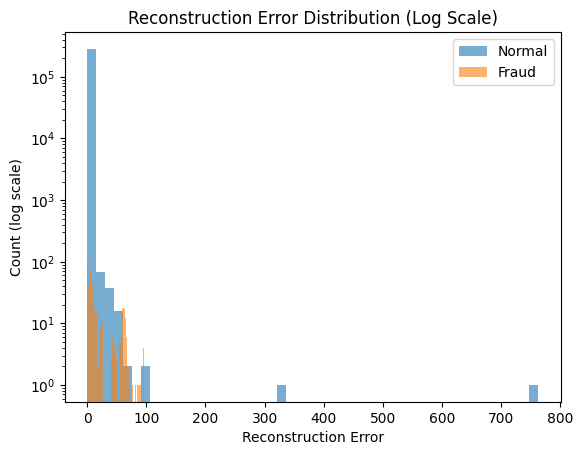

In [52]:
plt.hist(reconstruction_error[y_test == 0], bins=50, alpha=0.6, label="Normal")
plt.hist(reconstruction_error[y_test == 1], bins=50, alpha=0.6, label="Fraud")

plt.yscale("log")
plt.xlabel("Reconstruction Error")
plt.ylabel("Count (log scale)")
plt.legend()
plt.title("Reconstruction Error Distribution (Log Scale)")
plt.show()


In [39]:
import numpy as np

threshold = np.percentile(reconstruction_error[y_test == 0], 95)
y_pred = (reconstruction_error > threshold).astype(int)

print("Threshold:", threshold)


Threshold: 0.9058390357911489


In [40]:
print("NaNs in y_test:", y_test.isna().sum())
print("NaNs in y_pred:", np.isnan(y_pred).sum())


NaNs in y_test: 0
NaNs in y_pred: 0


In [41]:
y_test_clean = y_test.fillna(0).astype(int)
y_pred_clean = y_pred.astype(int)


In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_clean, y_pred_clean)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[270099  14216]
 [    81    411]]


In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test_clean, y_pred_clean))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.03      0.84      0.05       492

    accuracy                           0.95    284807
   macro avg       0.51      0.89      0.51    284807
weighted avg       1.00      0.95      0.97    284807



In [44]:
import numpy as np

print("NaNs in reconstruction_error:", np.isnan(reconstruction_error).sum())


NaNs in reconstruction_error: 0


In [45]:
mask = ~np.isnan(reconstruction_error)

reconstruction_error_clean = reconstruction_error[mask]
y_test_auc = y_test_clean.values[mask]


In [46]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test_auc, reconstruction_error_clean)
print("ROC AUC:", roc_auc)


ROC AUC: 0.9329954437630653


In [47]:
import numpy as np

mask = ~np.isnan(reconstruction_error)

reconstruction_error_clean = reconstruction_error[mask]
y_test_clean_auc = y_test_clean.values[mask]


In [48]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test_clean_auc, reconstruction_error_clean)
print("ROC AUC:", roc_auc)


ROC AUC: 0.9329954437630653


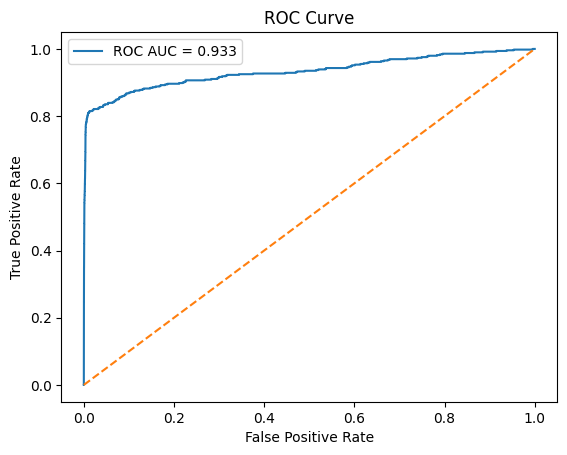

In [49]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test_clean_auc, reconstruction_error_clean)

plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

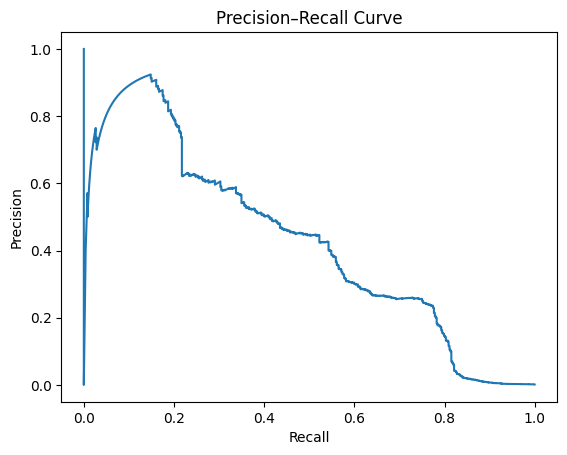

In [50]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(
    y_test_clean_auc,
    reconstruction_error_clean
)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()
